## 1.数据来源
[kesci](https://www.kesci.com/home/dataset/5ec341f83241a100378cf38d/files) 这是一个跨国数据集，其中包含2010年12月1日至2011年12月9日之间在英国注册的非商店在线零售的所有交易。该公司主要销售独特的全时礼品。

### 字段名称
InvoiceNo：发票编号

StockCode：仓库编号

Description：商品描述

Quantity：购买数量

InvoiceDate：发票日期

UnitPrice：商品单价

CustomerID：顾客ID

Country：售出国家

## 2.分析目的及结果
### 2.1分析目的
1. 对该公司过去一年的销售情况进行总结
2. 对该公司的客户以RFM模型建模，分析各类人群占比，并对运营提出相关建议
3. 将相应数据分析结构进行可视化

### 2.2分析结果
**总结：**  
1.总体来说该公司的销售额是相当依赖回头客的模式，有68.4%的顾客购买了两次及以上的商品，占总体客户16.9%的重要保持客户，贡献了68.87%的总销售额。
2.在过去的一年中该公司销售额迅速增长单月销量已是年初的两倍。
3.回流和活跃客户的增加说明召回运营工作有了很好的成效，11月相比1月活跃客户增加了90.6%,回流客户488.2%。  

公司总体趋势向好，不过也存在不少**问题：**  

4.数据缺失，尤其是4月有1/3的数据不齐，无论是备货还是总结，缺失数据都是很严重的问题。  
5.新客逐渐减少，可能是工作重心迁移至召回客户导致新客减少了23.7%。


## 3.数据导入与清洗
- 空值的检查与处理  
- 重复值的检查与处理  
- 异常值的检查与处理  
- 数据类型的检查与调整  

In [1]:
#导入依赖的第三方包
import pandas as pd 
import numpy as np 
#加载数据可视化包 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#可视化显示在页面 jupyter专属 %内置
%matplotlib inline
#更改设计风格
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']#(显示中文）
plt.rcParams['axes.unicode_minus'] = False#(显示负数）

In [2]:
#数据读取
df = pd.read_csv('data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#查看是否有空值
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
#删去空值
df.dropna(inplace=True)

In [5]:
#查看是否存在重复值
df.duplicated().sum()

5225

In [6]:
#删除重复值
df.drop_duplicates(inplace = True)

In [7]:
#数据格式概览
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [8]:
#修改相应列的格式
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate,format = "%m/%d/%Y %H:%M")
df.CustomerID = df.CustomerID.astype('str')

In [9]:
#删除此次分析中不需要使用到的列
del df['Description']
del df['StockCode']

In [10]:
#增加新列
df['Amount']=df['Quantity']*df['UnitPrice']
df['month'] = df.InvoiceDate.values.astype('datetime64[M]')
df['date'] = df.InvoiceDate.values.astype('datetime64[D]')

In [11]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,month,date
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [12]:
#数据概览
df.describe()

,Quantity,UnitPrice,Amount
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,20.613638
std,250.283037,69.764035,430.352218
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.700000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


平均每一种货物一次会售卖12件（20欧元），不过方差为250，中值为5，这说明有极值干扰，部分人群购买了大量货物。

In [13]:
#保存清洗后的数据
df.to_csv('data_cleaned.csv')

## 4.数据分析
### 4.1 整体销售数据概览

In [14]:
#每月销量数据表
df.pivot_table(index = 'month',
              values = ['Quantity','Amount','CustomerID'],
              aggfunc = {
                  'Quantity':'sum',
                  'Amount':'sum',
                  'CustomerID':'nunique'
                          }
              )

,Amount,CustomerID,Quantity
month,,,
2010-12-01,552372.860,948,295177
2011-01-01,473731.900,783,268755
2011-02-01,435534.070,798,262243
2011-03-01,578576.210,1020,343095
2011-04-01,425222.671,899,277730
2011-05-01,647011.670,1079,367115
2011-06-01,606862.520,1051,356239
2011-07-01,573112.321,993,361359
2011-08-01,615078.090,980,385865


In [15]:
grouped_user = df.groupby(by = 'CustomerID')
grouped_user[['Quantity','Amount']].sum().describe()

,Quantity,Amount
count,4372.000000,4372.000000
mean,1119.133349,1893.531433
std,4672.995712,8218.696204
min,-303.000000,-4287.630000
25%,151.750000,291.795000
50%,364.000000,644.070000
75%,956.250000,1608.335000
max,196719.000000,279489.020000


- 用户平均购买了1120件商品，但是中位数只有364，说明小部分用户购买了极大量的商品
- 用户平均消费1893元，中位数为644，判断同上，有极值干扰

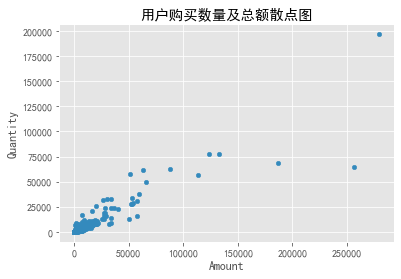

In [16]:
#用户购买数量及总额散点图
grouped_user.sum().query('Amount > 0').plot.scatter(x = 'Amount',y = 'Quantity')
plt.title("用户购买数量及总额散点图")
plt.show()

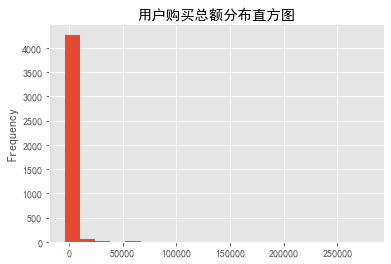

In [17]:
#用户购买总额分布直方图
grouped_user.sum().Amount.plot.hist(bins = 20)
plt.title("用户购买总额分布直方图")
plt.show()

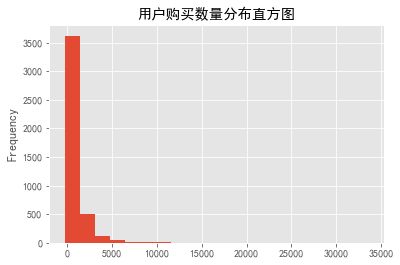

In [18]:
#根据切比雪夫原理筛选后的用户购买数量分布直方图
grouped_user.sum().query('Quantity < 34479').Quantity.plot.hist(bins = 20)
plt.title("用户购买数量分布直方图")
plt.show()

### 4.2  公司每月交易量变化

In [19]:
#交易总金额及交易总量和客单价的计算
grouped_month = df.groupby('month')
order_month_amount = grouped_month.Amount.sum()

tmp = df.pivot_table(index=['month','InvoiceNo'],values='Amount',aggfunc=np.sum).groupby('month')
unit_customer_price = round(tmp.sum()/tmp.count(),2)
sds = pd.Series(unit_customer_price['Amount'].values, index=unit_customer_price.index)
sds.name='Amount'

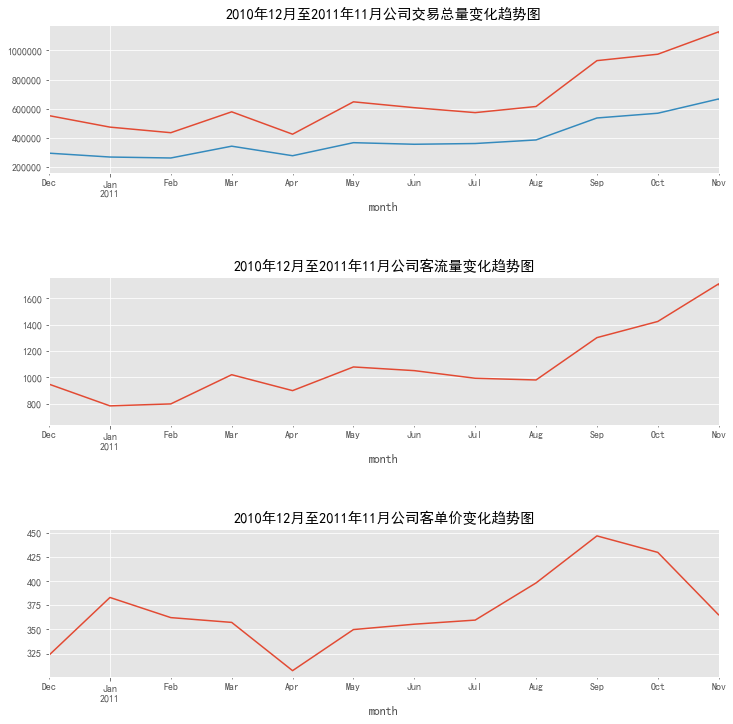

In [20]:
#数据可视化
plt.figure(figsize=(12,12))
#图1
plt.subplot(3,1,1)
order_month_amount.plot(label='交易总金额')
grouped_month.Quantity.sum().plot(label='交易总量')
plt.title('2010年12月至2011年11月公司交易总量变化趋势图')
plt.xlim(['2010-12-01','2011-11-01'])#2011年12月数据不齐故不显示
#图2
plt.subplot(3,1,2)
grouped_month.CustomerID.nunique().plot(label='客流量')
plt.xlim(['2010-12-01','2011-11-01'])
plt.title('2010年12月至2011年11月公司客流量变化趋势图')
#图3
plt.subplot(3,1,3)
sds.plot(label='客单价')
plt.xlim(['2010-12-01','2011-11-01'])
plt.title('2010年12月至2011年11月公司客单价变化趋势图')


plt.subplots_adjust(hspace=0.7)



In [21]:
#年终销量除年初销量
order_month_amount.iloc[11]/order_month_amount.iloc[0]

2.0399537189425363

由上图可知，  
1. 除了在2011年4月有过一次剧烈下跌，其他时间销量都是在一路上涨，2011年11月相比2010年12月销量翻了一番  

### 4.3四月总体销量为什么会下降？

In [22]:
#查看四月整体情况
df[df.InvoiceDate.dt.month==4].groupby('date')['Amount'].sum().describe()

count       21.000000
mean     20248.698619
std       6410.800826
min       6807.480000
25%      17992.191000
50%      20677.410000
75%      23542.550000
max      34875.090000
Name: Amount, dtype: float64

In [23]:
df[df.InvoiceDate.dt.month==4].groupby('date')['Amount'].sum().index

DatetimeIndex(['2011-04-01', '2011-04-03', '2011-04-04', '2011-04-05',
               '2011-04-06', '2011-04-07', '2011-04-08', '2011-04-10',
               '2011-04-11', '2011-04-12', '2011-04-13', '2011-04-14',
               '2011-04-15', '2011-04-17', '2011-04-18', '2011-04-19',
               '2011-04-20', '2011-04-21', '2011-04-26', '2011-04-27',
               '2011-04-28'],
              dtype='datetime64[ns]', name='date', freq=None)

四月本应有30天的销售数据，但这里只有21天,缺少了2，9，16，22，23，24，25，29，30日的销售数据，因为缺失九天的销售数据，所以销售额不足。  
**需要重新核查。**

# 5 用户分析
     5.1 用户分层（RFM）  
     5.2 用户状态分层  
     5.3 每月新客占比  
     5.4 每月复购率计算  




### 5.1用户分层（RFM）
- RFM
    - R:最后一次消费距离统计日期之间的天数，天数越小代表用户价值越高
    - F:消费总商品数，越大用户价值越高
    - M:消费总金额，越大用户价值越高

In [27]:
#创建RFM数据表
RFM = df.pivot_table(index = 'CustomerID',
                     values = ['Amount','InvoiceDate','Quantity'],
                     aggfunc = {'Amount':'sum',
                               'InvoiceDate':'max',
                               'Quantity':'sum'})

RFM['R'] = -(RFM.InvoiceDate - RFM.InvoiceDate.max()) / np.timedelta64(1,'D')
RFM.rename(columns = {'Amount':'M','Quantity':'F'},inplace = True)
del RFM['InvoiceDate']
RFM.head()

,M,F,R
CustomerID,,,
12346.0,0.00,0,325.106250
12347.0,4310.00,2458,1.873611
12348.0,1797.24,2341,74.984028
12349.0,1757.55,631,18.124306
12350.0,334.40,197,309.867361


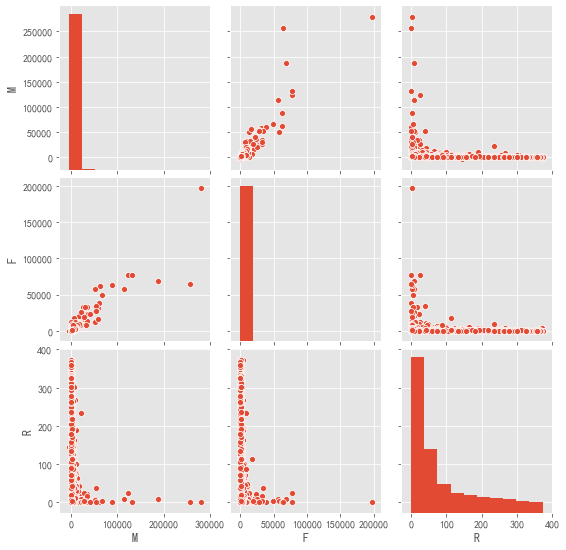

In [28]:
#RFM数据概览
sns.pairplot(RFM)

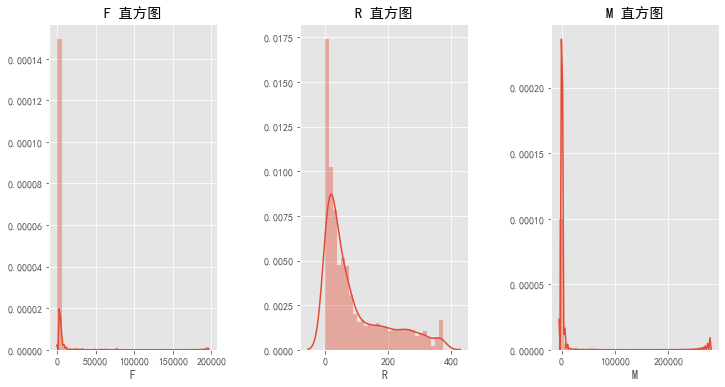

In [29]:
#单独抽出RFM直方图观看
plt.figure(1,figsize=(12,6))
n=0
for x in ['F','R','M']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(RFM[x],bins=30)
    plt.title('{} 直方图'.format(x))
plt.show()

从上图可以看出在本公司购买商品的客户绝大多数是进行少量多次购买的客户

In [30]:
#计算用于划分客户的阙值，R、F、M的均值（*通过分布直方图可以发现该份数据不适合用中位数来分层，因此这里用均值做分层）
RFM[['R','F','M']].apply(lambda x:x-x.mean())

,R,F,M
CustomerID,,,
12346.0,233.538272,-1119.133349,-1893.531433
12347.0,-89.694367,1338.866651,2416.468567
12348.0,-16.583950,1221.866651,-96.291433
12349.0,-73.443672,-488.133349,-135.981433
12350.0,218.299383,-922.133349,-1559.131433
...,...,...,...
18280.0,185.555633,-1074.133349,-1712.931433
18281.0,88.513272,-1065.133349,-1812.711433
18282.0,-84.521450,-1021.133349,-1716.931433


In [31]:
#创建label分析
def rfm_func(x):
    level = x.apply(lambda x : '1' if x>=0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    result = d[label]
    return result

RFM['label'] = RFM[['R','F','M']].apply(lambda x:x- x.mean()).apply(rfm_func,axis = 1)
RFM.head(10)

,M,F,R,label
CustomerID,,,,
12346.0,0.00,0,325.106250,一般挽留客户
12347.0,4310.00,2458,1.873611,重要保持客户
12348.0,1797.24,2341,74.984028,一般保持客户
12349.0,1757.55,631,18.124306,一般发展客户
12350.0,334.40,197,309.867361,一般挽留客户
12352.0,1545.41,470,35.925694,一般发展客户
12353.0,89.00,20,203.793750,一般挽留客户
12354.0,1079.40,530,231.985417,一般挽留客户
12355.0,459.40,240,213.959028,一般挽留客户


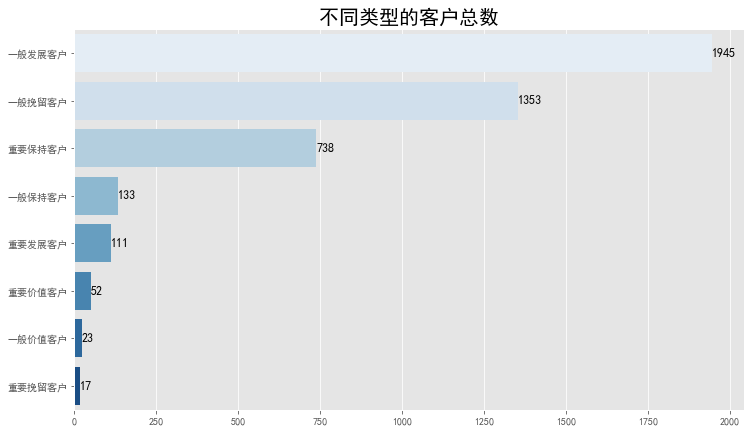

In [32]:
#查看不同类型顾客的总数
plt.figure(1,figsize=(12,7))
sns.countplot(y="label",order=RFM['label'].value_counts().index ,data=RFM,palette='Blues')
plt.title('不同类型的客户总数',fontsize=20)
plt.xlabel('')
plt.ylabel('')

con=list(RFM.groupby('label').label.count().values)
con=sorted(con,reverse=True)

for x,y in enumerate(con):
    plt.text(y+0.1,x,'%s' %y,va='center',size=12)
plt.show()

In [33]:
#各个类型顾客收入
RFM.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,28335.440,35039,3039.375000
一般保持客户,195478.820,212580,4037.395833
一般发展客户,1298728.693,747341,68518.433333
一般挽留客户,553016.990,309373,296079.500694
重要价值客户,198067.161,140330,8636.411111
重要保持客户,5701033.010,3334995,14220.069444
重要发展客户,256691.610,99715,2971.089583
重要挽留客户,47167.700,13478,2832.925000


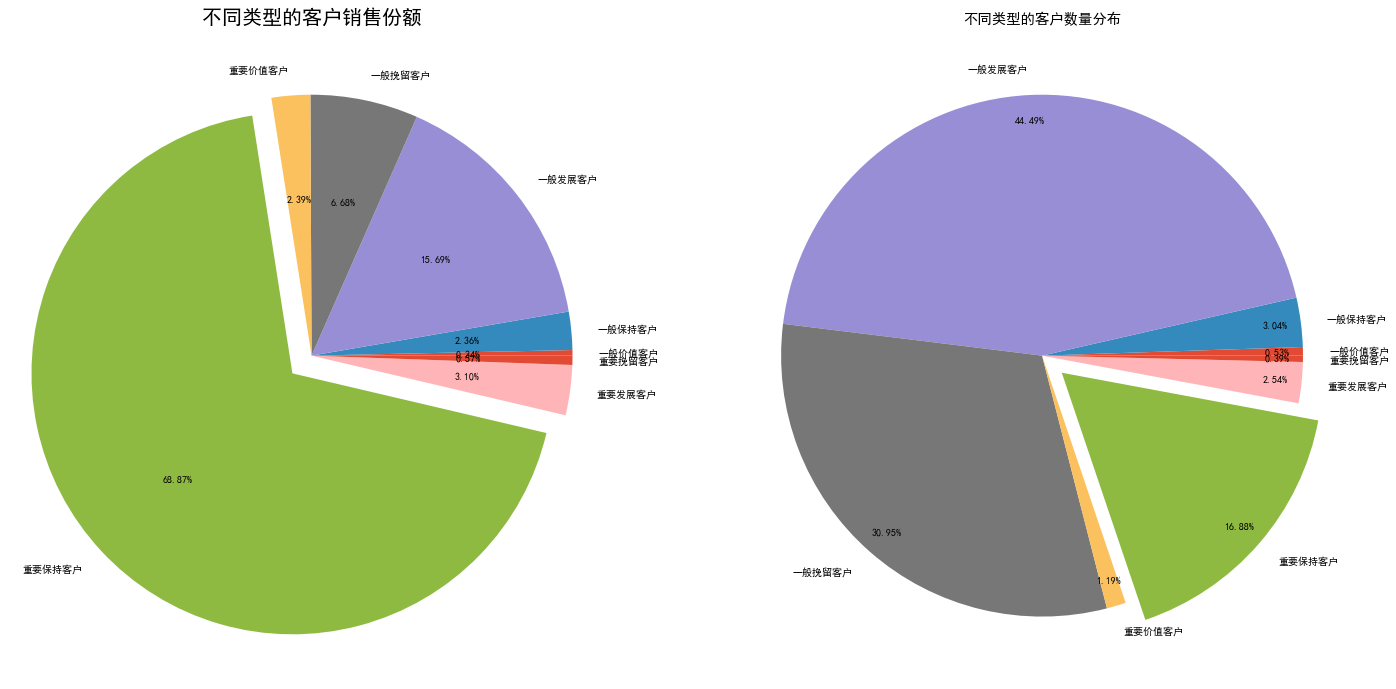

In [69]:
plt.figure(figsize=(24,12))
#不同类型的客户销售份额
plt.subplot(1,2,1)
plt.axis('equal')

labels=RFM.groupby('label').M.sum().index
explode=[0,0,0,0,0,0.1,0,0]

plt.pie(RFM.groupby('label').M.sum(),explode=explode,labels=labels,radius=1,autopct='%.2f%%')
plt.title('不同类型的客户销售份额',fontsize=20)

#不同类型的客户数量分布
plt.subplot(1,2,2)
plt.axis('equal')
plt.pie(RFM.groupby('label').count()['M'],autopct='%.2f%%',labels = labels,pctdistance=0.9,explode=explode,radius=1)
plt.title("不同类型的客户数量分布")
plt.show()

In [36]:
RFM.query("label=='重要保持客户'")['R'].describe()

count    738.000000
mean      19.268387
std       20.642683
min        0.000694
25%        3.818056
50%       10.152083
75%       28.948264
max       89.055556
Name: R, dtype: float64

### 5.2 用户状态分层

将用户状态分为unreg（未注册）、new（新客）、active（活跃用户）、return（回流用户）、unactive（不活跃用户)  
（所有客户初始状态为未注册）  

若本月没有消费 
- 未注册：之前是未注册，则依旧为未注册 
- 不活跃：之前有消费，则为不活跃 
- 未注册：其他情况，为未注册    


若本月有消费 
- 新用户：第一次消费 
- 回流：之前有过消费且上个月为不活跃  
- 活跃：除此之外，为活跃


In [37]:
# 数据透视表，空值填充为0
pivoted_counts = df.pivot_table(index = 'CustomerID',
                                  columns = 'month',
                                  values = 'InvoiceDate',
                                  aggfunc = 'count').fillna(0)
pivoted_counts.head()

month,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12346.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,31.0,29.0,0.0,0.0,24.0,0.0,18.0,0.0,22.0,0.0,47.0,0.0,11.0
12348.0,17.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0
12350.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#消费过的为1 ，没消费过的为0
data_purchase = pivoted_counts.applymap(lambda x: 1 if x > 0 else 0)

In [39]:
#用户状态
def active_status(data):
    status = []
    for i in range(13):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')                  
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
# 这里需要对返回的值进行转换，将列表转为Series
    return pd.Series(status, index = pivoted_counts.columns)

purchase_stats = data_purchase.apply(active_status,axis=1)
# df.rename(columns={ df.columns[2]: "new name" }, inplace=True)
# purchase_stats.rename(columns={purchase_stats.columns:data_purchase.columns})
purchase_stats.head()

month,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12346.0,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
12347.0,new,active,unactive,unactive,return,unactive,return,unactive,return,unactive,return,unactive,return
12348.0,new,active,unactive,unactive,return,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive
12349.0,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive
12350.0,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [40]:
#每个月活跃用户的计数 
purchase_status_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x : pd.value_counts(x))

#将 NaN 填充为0 ，转置
purchase_status_ct.fillna(0).T

,active,new,return,unactive
month,,,,
2010-12-01,0.0,948.0,0.0,0.0
2011-01-01,362.0,421.0,0.0,586.0
2011-02-01,299.0,380.0,119.0,951.0
2011-03-01,345.0,440.0,235.0,1169.0
2011-04-01,346.0,299.0,254.0,1589.0
2011-05-01,399.0,279.0,401.0,1688.0
2011-06-01,464.0,235.0,352.0,1951.0
2011-07-01,415.0,191.0,387.0,2200.0
2011-08-01,433.0,167.0,380.0,2380.0


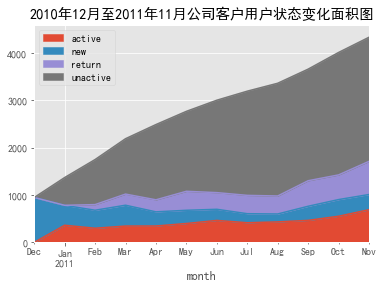

In [53]:
#对结果进行画图表示
purchase_status_ct.fillna(0).T.plot.area()
plt.xlim('2010-12','2011-11')
plt.title('2010年12月至2011年11月公司客户用户状态变化面积图')
plt.show()

从上图可以看出从九月开始的销量增长主要来自于回流和活跃客户。

In [42]:
#计算各消费状态层级用户占比
purchase_status_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis = 1)

,active,new,return,unactive
month,,,,
2010-12-01,0.000000,1.000000,0.000000,0.000000
2011-01-01,0.264427,0.307524,0.000000,0.428050
2011-02-01,0.170955,0.217267,0.068039,0.543739
2011-03-01,0.157606,0.201005,0.107355,0.534034
2011-04-01,0.139068,0.120177,0.102090,0.638666
2011-05-01,0.144199,0.100831,0.144922,0.610047
2011-06-01,0.154564,0.078281,0.117255,0.649900
2011-07-01,0.129972,0.059818,0.121203,0.689007
2011-08-01,0.128869,0.049702,0.113095,0.708333


## 5.3每月新客占比

In [43]:
user_life = grouped_user.date.agg(['min','max'])
user_life.head(10)

,min,max
CustomerID,,
12346.0,2011-01-18,2011-01-18
12347.0,2010-12-07,2011-12-07
12348.0,2010-12-16,2011-09-25
12349.0,2011-11-21,2011-11-21
12350.0,2011-02-02,2011-02-02
12352.0,2011-02-16,2011-11-03
12353.0,2011-05-19,2011-05-19
12354.0,2011-04-21,2011-04-21
12355.0,2011-05-09,2011-05-09


In [44]:
(user_life['min'] == user_life['max']).value_counts()

False    2991
True     1381
dtype: int64

可以看到68.4%的顾客都在此购买了不止一次

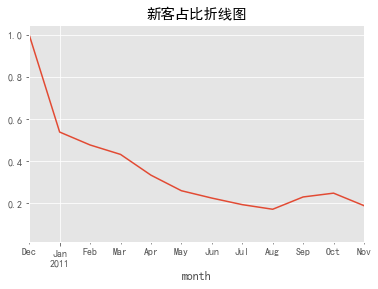

In [45]:
#按月份和用户ID分组
grouped_month_user = df.groupby(['month','CustomerID'])

#将 当月用户订单日期最小值 与 用户订单日期最小值 联结
tmp = grouped_month_user.InvoiceDate.agg(['min']).join(grouped_user.InvoiceDate.min())

# 判断用户当月订单日期最小值是否与用户订单日期最小值相等，新建字段new,new代表新客户
tmp['new'] = (tmp['min'] == tmp.InvoiceDate)

# 重置索引列,并按月分组,作新客占比折线图
tmp.reset_index().groupby('month').new.apply(lambda x: x.sum()/x.count()).plot()
plt.title("新客占比折线图")
plt.xlim('2010-12','2011-11')
plt.show()

从上图可以看出，每个月的新客占比正急速下降，在下降到20%左右后开始波动。

### 5.4复购率计算

（复购率：当月内，购买多次的用户占比）

In [46]:
#用户每个月的消费次数
pivoted_counts=df.pivot_table(index='CustomerID',
                              columns='month',
                              values='InvoiceDate',
                              aggfunc='count').fillna(0)
pivoted_counts.head()


month,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12346.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,31.0,29.0,0.0,0.0,24.0,0.0,18.0,0.0,22.0,0.0,47.0,0.0,11.0
12348.0,17.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0
12350.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#用户每个月的消费次数
pivoted_counts=df.pivot_table(index='CustomerID',
                              columns='month',
                              values='InvoiceNo',
                              aggfunc='nunique').fillna(0)
pivoted_counts.head()


month,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12346.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
12348.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12350.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# applymap() 如果消费超过1次则赋值为1 若等于1则赋值为0  若无消费则赋值为空
purchase_r = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)
purchase_r.head()


month,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
CustomerID,,,,,,,,,,,,,
12346.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
12348.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
12350.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


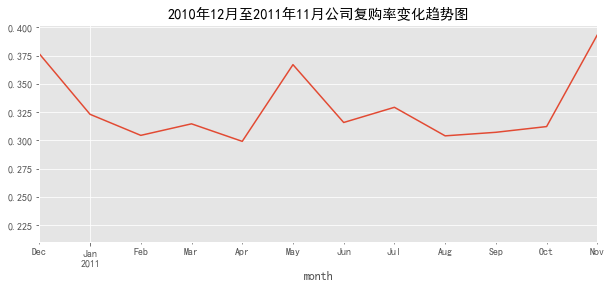

In [49]:
#  复购率= sum()复购人数 / 总消费人数count()  
(purchase_r.sum() / purchase_r.count()).plot(figsize = (10,4))

plt.title('2010年12月至2011年11月公司复购率变化趋势图')
plt.xlim('2010-12','2011-11')
plt.show()

复购率在30%-40%之间波动。

## 6.公司发展建议

**总结：**  
1.总体来说该公司的销售额是相当依赖回头客的模式，有68.4%的顾客购买了两次及以上的商品，占总体客户16.9%的重要保持客户，贡献了68.87%的总销售额。
2.在过去的一年中该公司销售额迅速增长单月销量已是年初的两倍。
3.回流和活跃客户的增加说明召回运营工作有了很好的成效，11月相比1月活跃客户增加了90.6%,回流客户488.2%。  

公司总体趋势向好，不过也存在不少**问题：**  

4.数据缺失，尤其是4月有1/3的数据不齐，无论是备货还是总结，缺失数据都是很严重的问题。  
5.新客逐渐减少，可能是工作重心迁移至召回客户导致新客减少了23.7%。

**建议：**  
1.虽然有70%左右的顾客会多次购买，但是每月的复购率是在30%-40%之间波动，需要对购买客户进行更深的客户调查，是否是因为存在大量的小体量顾客所以复购率偏低  
2.从2010年12月至2011年11月公司客户用户状态变化面积图中可以看出，新顾客的数量正在急剧减少，根据AARRR模型，该公司目前获得曝光过少会影响未来的收入增长。其次，逐步增加的回流客户和活跃客户表明目前的召回运营行之有效，需要持续。  
3.公司收入最重要的群体就是重要保持客户，需要运营重点维持。  
4.需要确认是否需要更多预算吸引新客户。  
5.复检数据，检查数据缺失情况。